In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('emotions.csv')

In [3]:
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [58]:
X = df.drop('label' , axis = 1)
y = df2['label_numeric']

In [60]:
from sklearn.preprocessing import StandardScaler

In [62]:
ss = StandardScaler()

In [80]:
ss.fit(X)

StandardScaler()

In [82]:
standard = ss.transform(X)

In [83]:
from sklearn.decomposition import PCA

In [84]:
pca = PCA(n_components=3)

In [88]:
pca.fit(standard)

PCA(n_components=3)

In [89]:
x_pca = pca.transform(standard)

In [90]:
df1 = pd.DataFrame(x_pca)

In [91]:
df1.head()

,0,1,2
0,35.673628,22.592538,-22.875317
1,-21.883141,-2.025722,0.033777
2,35.250899,-14.889905,5.624300
3,2.067388,-20.887679,24.824586
4,-25.226594,-2.199921,0.924428


In [136]:
df2 = pd.concat([df1,y] , axis = 1)

In [140]:
df2.rename({0 : 'Beta' , 1 : 'Alpha' , 2 : 'Beta/Theta'} , axis = 1)

,Beta,Alpha,Beta/Theta,label_numeric
0,35.673628,22.592538,-22.875317,0
1,-21.883141,-2.025722,0.033777,1
2,35.250899,-14.889905,5.624300,2
3,2.067388,-20.887679,24.824586,2
4,-25.226594,-2.199921,0.924428,1
...,...,...,...,...
2127,-22.676582,-1.038454,0.185752,1
2128,24.146281,-20.813836,12.578603,2
2129,19.754931,15.404161,35.297603,0
2130,27.086692,-33.850200,-35.321349,0


In [128]:
df2.head()

,0,1,2,label_numeric
0,35.673628,22.592538,-22.875317,0
1,-21.883141,-2.025722,0.033777,1
2,35.250899,-14.889905,5.624300,2
3,2.067388,-20.887679,24.824586,2
4,-25.226594,-2.199921,0.924428,1


In [130]:
label_mapping = {
    'NEGATIVE': 0,
    'NEUTRAL': 1,
    'POSITIVE': 2
}

df2['label_numeric'] = df['label'].map(label_mapping)

In [100]:
df2.head()

,0,1,2,label_numeric
0,35.673628,22.592538,-22.875317,0
1,-21.883141,-2.025722,0.033777,1
2,35.250899,-14.889905,5.624300,2
3,2.067388,-20.887679,24.824586,2
4,-25.226594,-2.199921,0.924428,1


In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
rf = RandomForestClassifier(n_estimators=1000)

In [107]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [112]:
pred = rf.predict(X_test)

In [113]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [114]:
metrics.mean_absolute_error(pred,y_test)

0.01875

In [122]:
metrics.mean_squared_error(pred,y_test)

0.0375

In [132]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       208
           1       1.00      1.00      1.00       219
           2       0.98      0.99      0.99       213

    accuracy                           0.99       640
   macro avg       0.99      0.99      0.99       640
weighted avg       0.99      0.99      0.99       640



Text(0, 0.5, 'Actual Outcomes')

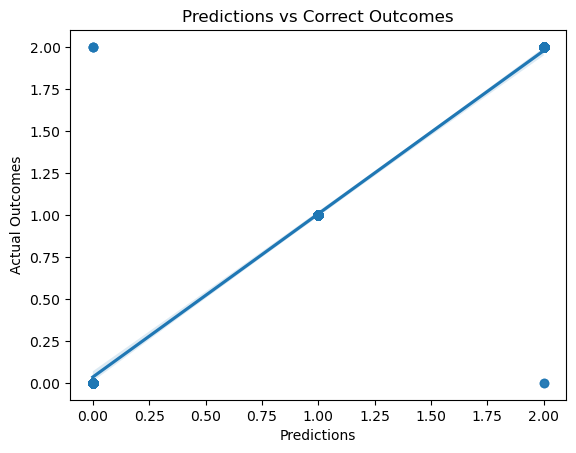

In [134]:
plt.figure()
sns.regplot(x = pred , y = y_test)
plt.title('Predictions vs Correct Outcomes')
plt.xlabel('Predictions')
plt.ylabel('Actual Outcomes')